<a href="https://colab.research.google.com/github/sofianna-e/DeliveriesEKPA/blob/main/Anomaly_Detection_ECOD_and_IForest_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [414]:
#εγκατάσταση πακέτου PyOD (https://pyod.readthedocs.io/en/latest/)
!pip install pyod

In [415]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pyod.models.ecod import ECOD
from pyod.models.iforest import IForest
import matplotlib.pyplot as plt

In [416]:
#εισαγωγή του συνόλου δεδομένων
network_data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/network_traffic_data.csv', delimiter=',')

In [417]:
# εξαγωγή χαρακτηριστικών
features = ['src_port', 'dest_port', 'packet_size', 'num_packets',
            'flow_duration', 'bytes_transferred', 'packet_rate']
X = network_data[features].values

In [418]:
# κλιμάκωση δεδομένων
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [419]:
# εκπαίδευση του αλγορίθμου ECOD
ecod_model = ECOD(contamination=0.02)
ecod_model.fit(X_scaled)

ECOD(contamination=0.02, n_jobs=1)

In [420]:
# πρόβλεψη βαθμού ανωμαλίας
anomaly_scores_ecod = ecod_model.decision_function(X_scaled)

In [421]:
# προσθήκη βαθμού ανωμαλίας στο σύνολο δεδομένων
network_data['anomaly_score_ecod'] = anomaly_scores_ecod

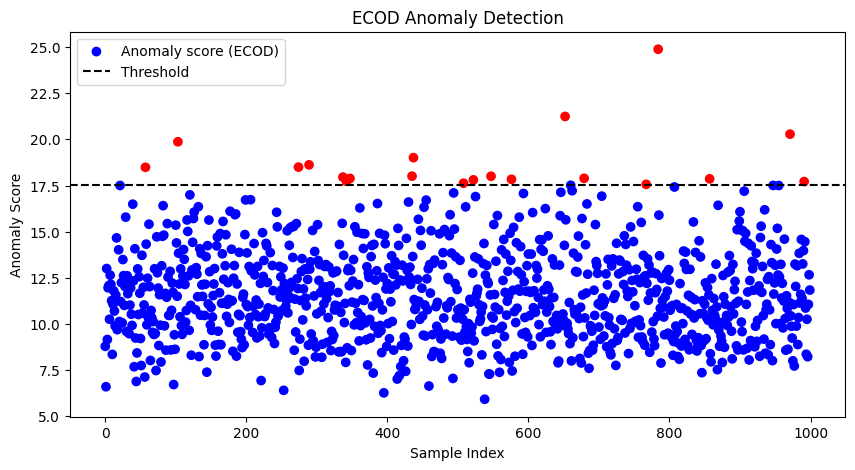

In [422]:
# οπτικοποίηση αποτελεσμάτων ECOD
colors = ['blue' if score <= ecod_model.threshold_ else 'red' for score in anomaly_scores_ecod]
plt.figure(figsize=(10,5))
plt.scatter(network_data.index, anomaly_scores_ecod, c=colors, label='Anomaly score (ECOD)')
plt.axhline(y=ecod_model.threshold_, color='black', linestyle='--', label='Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Anomaly Score')
plt.legend()
plt.title('ECOD Anomaly Detection')
plt.show()

In [423]:
# τύπωση των τιμών που εντοπίσθηκαν ως ανωμαλίες
anomalies_ecod = network_data[network_data['anomaly_score_ecod'] > ecod_model.threshold_]
print("Detected Anomalies (ECOD):")
print(anomalies_ecod)

Detected Anomalies (ECOD):
              src_ip          dest_ip  src_port  dest_port protocol  \
57      14.119.240.3    156.201.16.65      1167      63332     ICMP   
103    89.145.197.36    18.163.186.62     65172      62054      UDP   
274  124.101.237.131     42.206.11.39     14464      63598     ICMP   
289   153.152.11.132   211.36.233.208     63538       3010      UDP   
337    96.163.130.72  159.186.229.190      9670      10496      TCP   
342    148.7.229.199    199.246.71.61     13841      31790      UDP   
347    97.214.29.115    189.51.88.126     58963      61750      TCP   
435    248.86.42.128    29.10.219.107     25928      65384      UDP   
437   151.16.132.147  122.199.190.191     44814       2105     ICMP   
508     108.75.29.57  205.233.248.237      5403      64437     ICMP   
522   204.106.112.93   76.131.230.245      8266      64908      UDP   
547  247.202.147.215   230.242.146.37      6539      11718     ICMP   
576    232.167.57.27     165.27.24.95     57598   

In [424]:
#χρήση αλγορίθμου Isolation Forest
model = IForest(contamination=0.02, random_state=42)
model.fit(X_scaled)

IForest(behaviour='old', bootstrap=False, contamination=0.02,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=42, verbose=0)

In [425]:
#πρόβλεψη βαθμού ανωμαλίας
anomaly_scores = model.decision_function(X_scaled)

In [426]:
#προσθήκη βαθμού ανωμαλίας (anomaly score) στο σύνολο δεδομένων
network_data['anomaly_score'] = anomaly_scores

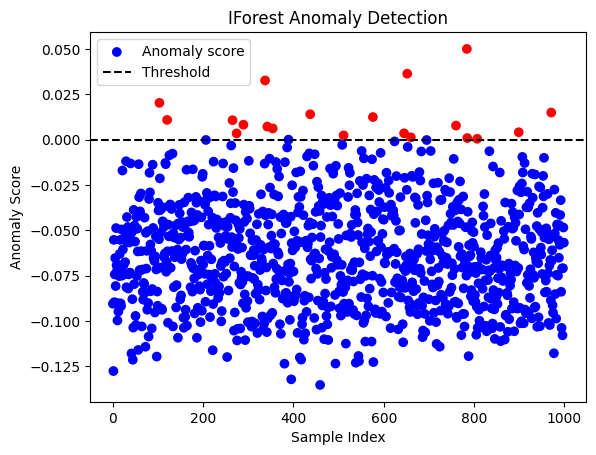

In [427]:
#οπτικοποίηση αποτελεσμάτων IForest, με μπλε οι τιμές που θεωρούνται κανονικές και με κόκκινο όσες καταγράφονται ως ανωμαλίες
colors = ['blue' if score <= model.threshold_ else 'red' for score in anomaly_scores]

plt.scatter(network_data.index, anomaly_scores, c=colors, label='Anomaly score')
plt.axhline(y=model.threshold_, color='black', linestyle='--', label='Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Anomaly Score')
plt.legend()
plt.title('IForest Anomaly Detection')
plt.show()

In [428]:
#τύπωση των τιμών που εντοπίσθηκαν ως ανωμαλίες
anomalies = network_data[network_data['anomaly_score'] > model.threshold_]
print("Detected Anomalies:")
print(anomalies)

Detected Anomalies:
              src_ip          dest_ip  src_port  dest_port protocol  \
103    89.145.197.36    18.163.186.62     65172      62054      UDP   
120      99.1.205.76     53.87.67.219      2323       6690      UDP   
265     71.88.45.195    20.171.132.86     19691      60436      UDP   
274  124.101.237.131     42.206.11.39     14464      63598     ICMP   
289   153.152.11.132   211.36.233.208     63538       3010      UDP   
337    96.163.130.72  159.186.229.190      9670      10496      TCP   
342    148.7.229.199    199.246.71.61     13841      31790      UDP   
354     211.2.143.29   142.204.16.151     61037      12377     ICMP   
437   151.16.132.147  122.199.190.191     44814       2105     ICMP   
511   227.93.182.112     115.47.225.9     58564       2318      TCP   
576    232.167.57.27     165.27.24.95     57598       2156      TCP   
645  250.123.118.120     154.10.37.97      4515      61776     ICMP   
652    186.77.221.40  152.139.153.101     59121      6355

In [429]:
#δημιουργία αποθετηρίων για την αποθήκευση των αποτελεσμάτων απόδοσης των μοντέλων
ML_Model = []
acc_train = []
acc_test = []

In [430]:
y_pred_ecod = ecod_model.labels_
acc_train_ecod = (y_pred_ecod == y_pred_ecod).sum() / y_pred_ecod.size
acc_test_ecod = acc_train_ecod

ML_Model.append('ECOD')
acc_train.append(acc_train_ecod)
acc_test.append(acc_test_ecod)

In [431]:
y_pred_iforest = model.labels_
acc_train_iforest = (y_pred_iforest == y_pred_iforest).sum() / y_pred_iforest.size
acc_test_iforest = acc_train_iforest

ML_Model.append('Isolation Forest')
acc_train.append(acc_train_iforest)
acc_test.append(acc_test_iforest)

In [432]:
results = pd.DataFrame({
    'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test
})

In [433]:
# ταξινόμηση του πλαισίου δεδομένων με βάση την ακρίβεια των μοντέλων
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
0,ECOD,1.0,1.0
1,Isolation Forest,1.0,1.0
